In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent))
from src.datamodule.av2_dataset import Av2Dataset
from src.datamodule.av2_extractor import Av2Extractor
from src.datamodule.av2_dataset import collate_fn
from src.model.trainer_mae import Trainer as TrainerMae
from src.model.trainer_forecast import Trainer as TrainerForecast

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
ckpt = "../checkpoints/mae_pretrain.ckpt"
model = TrainerMae.load_from_checkpoint(ckpt, strict=False)
model = model.eval()

/home/bkantz/cgv/other/forecast-mae/.venv/lib/python3.10/site-packages/lightning_lite/utilities/cloud_io.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.lo

In [23]:
from av2.datasets.motion_forecasting import scenario_serialization
from av2.map.map_api import ArgoverseStaticMap

data_root = Path("../data")  # Path to the datase
dataset = Av2Dataset(
    data_root=data_root, extractor=Av2Extractor(radius=150)
)


Extracting data from ../data
data root: ../data/None, total number of files: 24984


findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font family 'Serif' not found.
findfont: Font f

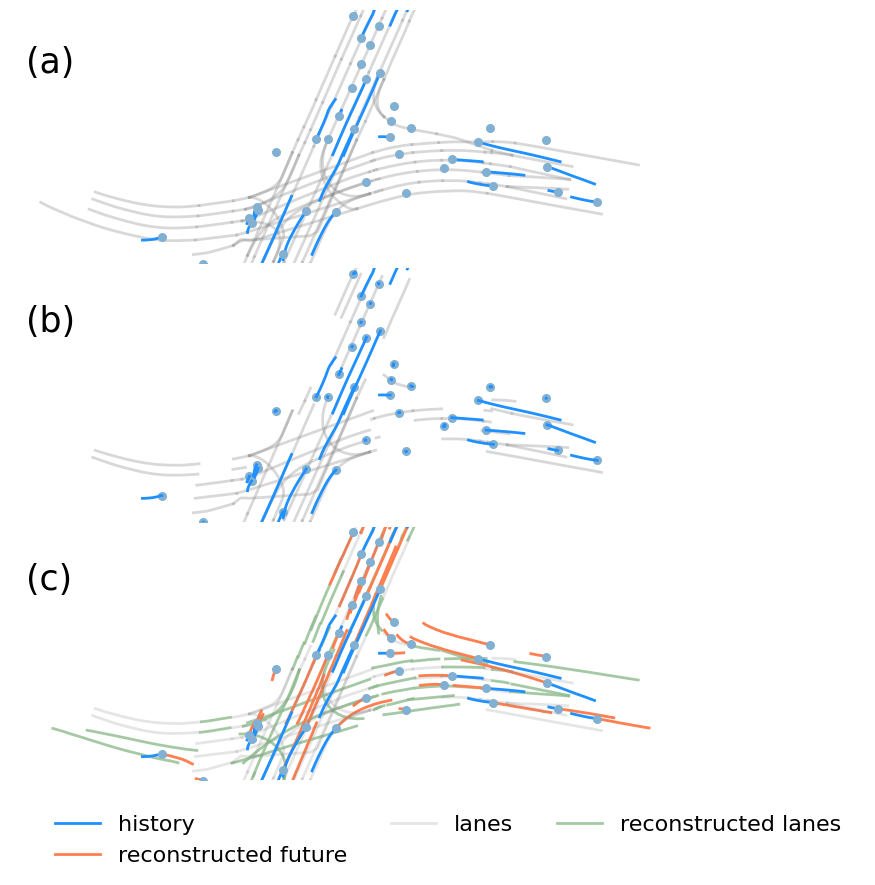

In [25]:
from src.utils.vis_mae import plot_reconstruction
data_root_split=data_root / "test"
data = dataset[0]
scene_id = data["scenario_id"]
scene_file = data_root_split / scene_id / ("scenario_" + scene_id + ".parquet")
map_file = data_root_split / scene_id / ("log_map_archive_" + scene_id + ".json")
scenario = scenario_serialization.load_argoverse_scenario_parquet(scene_file)
static_map = ArgoverseStaticMap.from_json(map_file)

batch = collate_fn([data])
out = model(batch)
plot_reconstruction(batch, out)